<a href="https://colab.research.google.com/github/2303A52500/AIML-ASSIGNMENTS/blob/main/AIML_ASS_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DECISION TREE**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
car_data = fetch_openml(name='car', version=1, as_frame=True)
data = car_data['data']
target = car_data['target']
df = data.copy()
df['target'] = target
print("Feature names:", car_data.feature_names)
print(df.describe())
print(df.info())
print(df.isnull().sum())


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


Feature names: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
       buying maint doors persons lug_boot safety target
count    1728  1728  1728    1728     1728   1728   1728
unique      4     4     4       3        3      3      4
top      high  high     2       2      big   high  unacc
freq      432   432   432     576      576    576   1210
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   buying    1728 non-null   category
 1   maint     1728 non-null   category
 2   doors     1728 non-null   category
 3   persons   1728 non-null   category
 4   lug_boot  1728 non-null   category
 5   safety    1728 non-null   category
 6   target    1728 non-null   category
dtypes: category(7)
memory usage: 13.1 KB
None
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


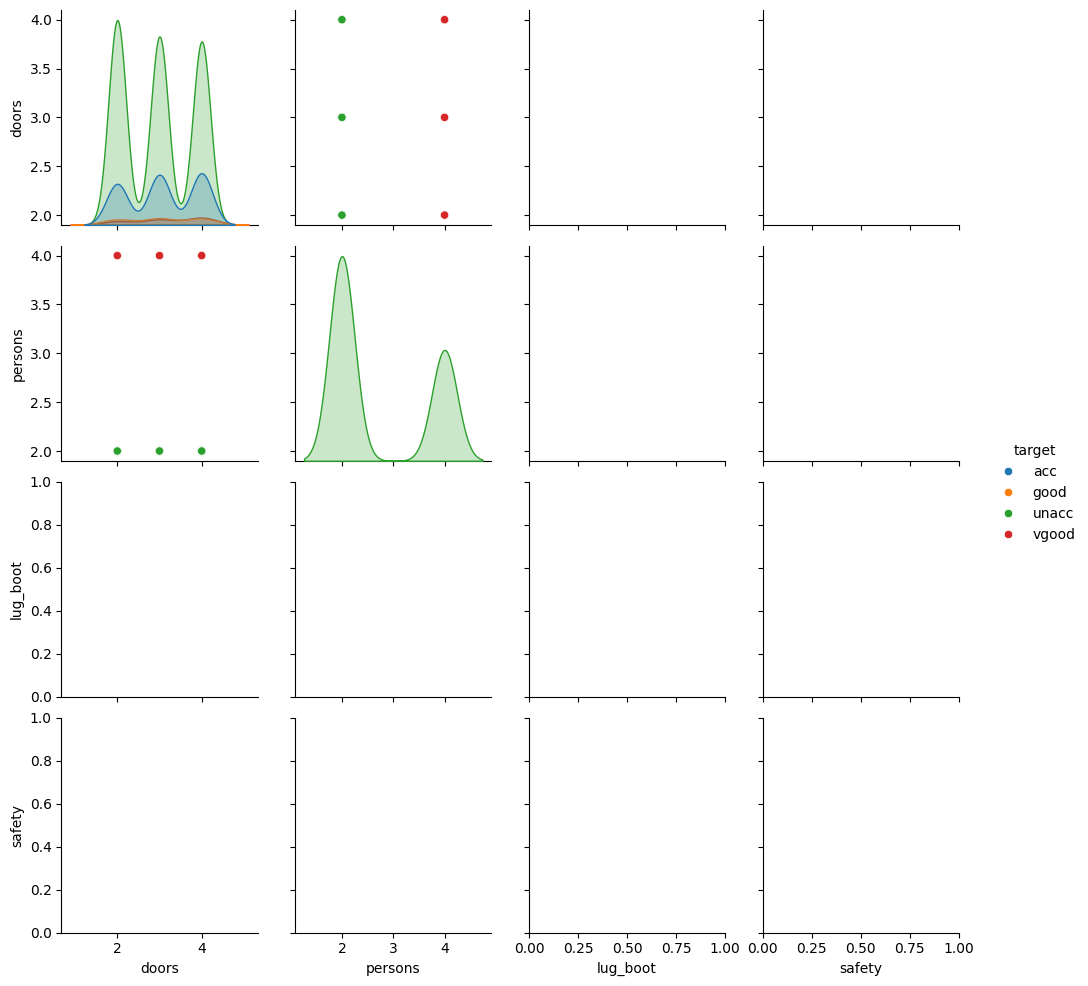

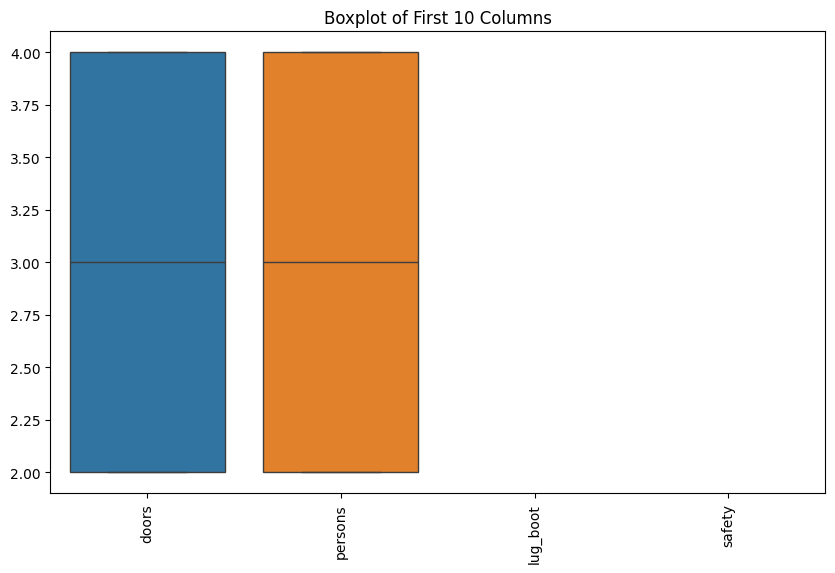

In [5]:
car_data = fetch_openml(name='car', version=1, as_frame=True)
data = car_data['data']
target = car_data['target']
df = data.copy()
df['target'] = target
for col in ['persons', 'doors', 'lug_boot', 'safety']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df, hue="target", vars=numeric_cols)
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :10])
plt.xticks(rotation=90)
plt.title("Boxplot of First 10 Columns")
plt.show()

In [6]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
car_data = fetch_openml(name='car', version=1, as_frame=True)
data = car_data['data']
target = car_data['target']
df = data.copy()
df['target'] = target
categorical_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8940269749518305
Classification Report:
               precision    recall  f1-score   support

         acc       0.85      0.70      0.77       118
        good       0.54      0.68      0.60        19
       unacc       0.94      0.97      0.96       358
       vgood       0.73      0.79      0.76        24

    accuracy                           0.89       519
   macro avg       0.77      0.79      0.77       519
weighted avg       0.90      0.89      0.89       519

Confusion Matrix:
 [[ 83   8  20   7]
 [  4  13   2   0]
 [  9   0 349   0]
 [  2   3   0  19]]


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(
